procurement=közbeszerzés

In [3]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"]=20,10
plt.rcParams["font.size"]=15
%matplotlib inline

import networkx as nx

Reading the datafile.

In [4]:
df=pd.read_csv(
    "AllTenders.csv.gz",
    sep=",",
    skiprows=1,
    compression="gzip",
    low_memory=False,
    index_col=0)

In [5]:
from datetime import datetime

In [6]:
df[df.columns[4:7]]=df[df.columns[4:7]].apply(lambda row: [datetime.strptime(date,"%Y-%m-%d") for date in row], axis=1)

A glimpse into the datafile.

In [50]:
df.shape

(138335, 176)

In [51]:
df.head(5).transpose().head(50)

id,1,2,3,4,5
procurring_entity_id,1,2,3,3,5
tender_type,ელექტრონული ტენდერი,ელექტრონული ტენდერი,გამარტივებული ელექტრონული ტენდერი,გამარტივებული ელექტრონული ტენდერი,გამარტივებული ელექტრონული ტენდერი
tender_registration_number,SPA130012785,SPA130012786,SPA130012787,SPA130012788,SPA130012781
tender_status,ხელშეკრულება დადებულია,ხელშეკრულება დადებულია,ხელშეკრულება დადებულია,ხელშეკრულება დადებულია,ხელშეკრულება დადებულია
tender_announcement_date,2013-06-11 00:00:00,2013-06-11 00:00:00,2013-06-11 00:00:00,2013-06-11 00:00:00,2013-06-11 00:00:00
bid_start_date,2013-06-28 00:00:00,2013-06-28 00:00:00,2013-06-13 00:00:00,2013-06-13 00:00:00,2013-06-12 00:00:00
bid_end_date,2013-07-03 00:00:00,2013-07-03 00:00:00,2013-06-17 00:00:00,2013-06-17 00:00:00,2013-06-14 00:00:00
estimated_value,22110,2870,4935,4947,2700
include_vat,NaN,NaN,NaN,NaN,NaN
cpv_code_and_description,66500000 - სადაზღვევო და საპენსიო მომსახურებები,39200000 - ავეჯის აქსესუარები,22600000 - საღებავი,22500000 - საბეჭდი ფორმები ან ცილინდრები ან ბე...,79800000 - ბეჭდვა და მასთან დაკავშირებული მომს...


In [10]:
print min(df.tender_announcement_date)
print max(df.tender_announcement_date)

2010-12-23 00:00:00
2015-05-27 00:00:00


What are the column names? (There are 35 bidders, each of them has 4 columns: `name, id, lowest bid, black_or_white`.)

procurring_entity_id:

tender_type : 
    4 type: 
        Electronic Tender
        Simplified electronic tender
        Consolidated Tender
        Electronic procurement procedure
        
tender_registration_number:
    
tender_status:
    
tender_announcement_date:
    
* bid_start_date
* bid_end_date
* estimated_value
* include_vat
* cpv_code_and_description:
* offer_step
* guarantee_amount
* guarantee_period
* created_at
* updated_at
* dataset_id
* url_id
* num_bids
* num_bidders
* contract_value

currency:
    
winning_org_id
risk_indicators
procurer_name
supplier_name
sub_codes
inProgress
updated
is_new
procurer_code:
    
winner_code:
    The winner's code
number_of_amendments
bidder_0_name
bidder_0_id
bidder_0_lowest_bid
bidder_0_black_or_white

In [11]:
#print "\n".join(df.columns[0:37])

How many rows and columns are there in the dataframe?

In [12]:
df.shape

(138335, 176)

In [36]:
df.cpv_code_and_description.value_counts()

45200000 - მთლიანი ან ნაწილობრივი სამშენებლო სამუშაოები და სამოქალაქო მშენებლობის სამუშაოები                                                          11882
45400000 - შენობის დასრულების სამუშაოები                                                                                                               6567
30200000 - კომპიუტერული მოწყობილობები და აქსესუარები                                                                                                   6285
30100000 - საოფისე მანქანა-დანადგარები, აღჭურვილობა და საკანცელარიო ნივთები, კომპიუტერების, პრინტერებისა და ავეჯის გარდა                               4950
09100000 - საწვავი                                                                                                                                     4578
71300000 - საინჟინრო მომსახურებები                                                                                                                     4306
50100000 - სატრანსპორტო საშუალებებისა და მათთან დაკავშირებული მო

What are the unique tender types? And their number?

In [12]:
print "\n".join(df.tender_type.unique())
print df.groupby("tender_type").size()

ელექტრონული ტენდერი
გამარტივებული ელექტრონული ტენდერი
კონსოლიდირებული ტენდერი
შესყიდვის ელექტრონული პროცედურა
tender_type
გამარტივებული ელექტრონული ტენდერი    100478
ელექტრონული ტენდერი                   37322
კონსოლიდირებული ტენდერი                  57
შესყიდვის ელექტრონული პროცედურა         478
dtype: int64


In [64]:
print "\n".join(map(lambda text: trans.translate(text,"en"),df.tender_type.unique()))

Electronic Tender
Simplified electronic tender
Consolidated Tender
Electronic procurement procedure


What are the unique tender statuses?

In [30]:
print "\n".join(df.tender_status.unique())

ხელშეკრულება დადებულია
ტენდერი არ შედგა
დასრულებულია უარყოფითი შედეგით
ტენდერი შეწყვეტილია
გამარჯვებული გამოვლენილია
წინადადებების მიღება დასრულებულია
მიმდინარეობს ხელშეკრულების მომზადება
შერჩევა/შეფასება
ტენდერი გამოცხადებულია
წინადადებების მიღება დაწყებულია


In [65]:
print "\n".join(map(lambda text: trans.translate(text,"en"),df.tender_status.unique()))

Contract Awarded
No Bids
Contract
Tender canceled
Winner Identified
Bidding completed
Preparation of contract
Selection / Evaluation
Tender Announced
Bids started


Estimated value vs number of tenders

/home/bencs/.anaconda/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


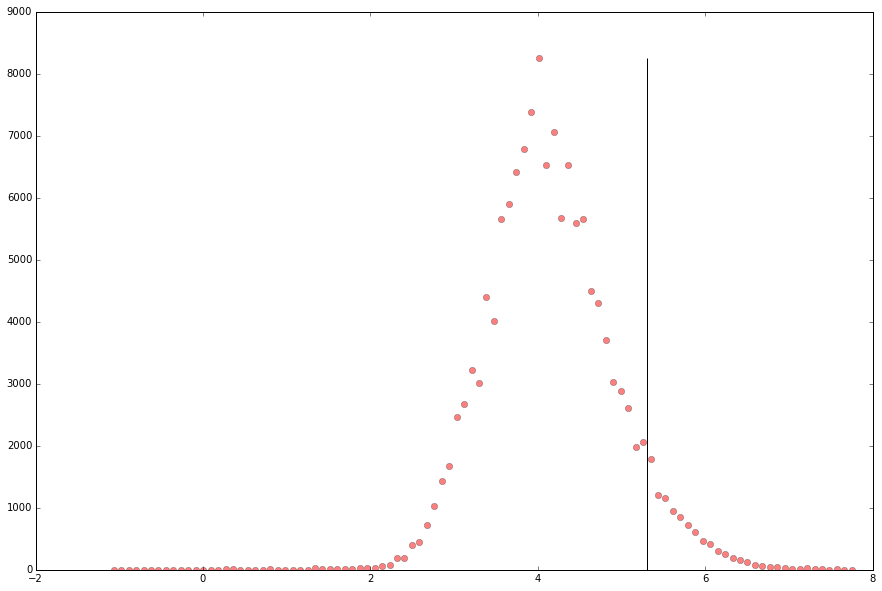

In [7]:
y,x=np.histogram(np.log10(np.array(df["estimated_value"])),bins=100)#.plot(kind="hist",bins=100,range=(0,300000),figsize=(15,10))
plt.figure(figsize=(15,10))
plt.plot(x[1:],y,'or',alpha=0.5)
plt.vlines(np.log10(2e5),0,np.max(y))
#plt.loglog()

#np.histogram(np.array(df.groupby("estimated_value").size()),bins=100)

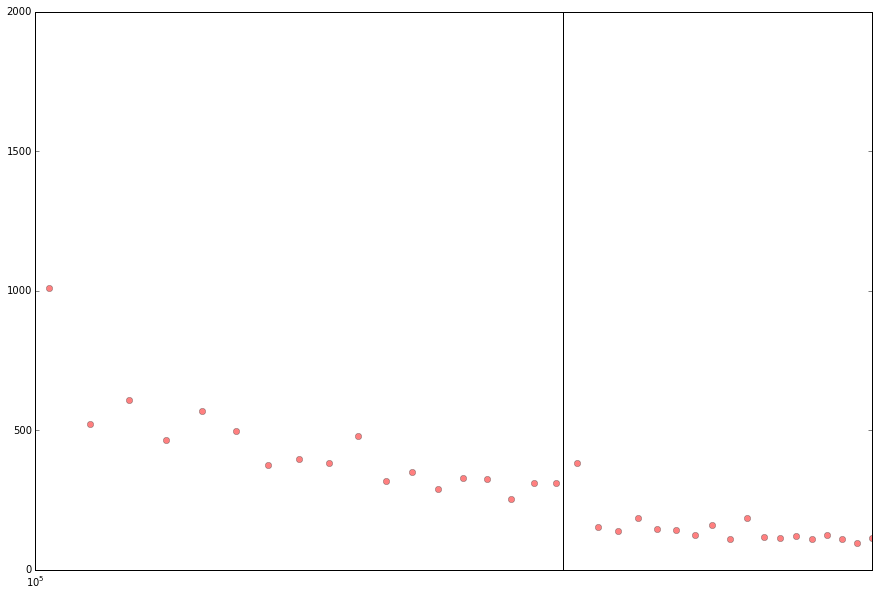

In [15]:
y,x=np.histogram(np.array(df["estimated_value"]),bins=10000)#.plot(kind="hist",bins=100,range=(0,300000),figsize=(15,10))
plt.figure(figsize=(15,10))
plt.plot(x[1:],y,'or',alpha=0.5)
plt.xlim([1e5,3e5])
plt.semilogx()
plt.ylim([0,2000])
plt.axvline(2e5,color='black')

#np.histogram(np.array(df.groupby("estimated_value").size()),bins=100)

To create a new column for the list of bidders

In [19]:
df['bidders']=df[df.columns[33::4]].apply(lambda row: [x for x in row if pd.isnull(x)==False], axis=1)
df['bidders_lowest_bids']=df[df.columns[34::4]].apply(lambda row: [x for x in row if pd.isnull(x)==False], axis=1)

In [54]:
df[['tender_registration_number','bidders','bidders_lowest_bids']].head(10)

,tender_registration_number,bidders,bidders_lowest_bids
id,,,
1,SPA130012785,[204545572],[22110.0]
2,SPA130012786,[406030370],[2792.0]
3,SPA130012787,[204544635],[4723.0]
4,SPA130012788,[204544635],[4844.0]
5,SPA130012781,"[202886172, 404880483, 404924427]","[2700.0, 2299.0, 2300.0]"
6,SPA130012782,"[205043237, 202223147, 206258182, 404383225]","[7198.0, 7199.0, 10420.0, 11420.0]"
7,SPA130012783,[],[]
8,SPA130012784,"[240420193, 206345356]","[42000.0, 31999.0]"
9,SPA130012777,"[401978650, 22001018663, 62006020466]","[730.0, 738.0, 996.0]"


To create the weighted cobbider graph!

In [20]:
tdf=df[df.bidders.apply(lambda x: x!=[])][['tender_registration_number','bidders']]
tdf.columns=[0,1]

In [21]:
tdf=pd.DataFrame([\
tdf\
      .apply(lambda row: [row[0]]*len(row[1]),axis=1)\
      .apply(pd.Series).transpose()\
      .unstack()\
      .reset_index(drop=True)\
      .dropna()\
      .tolist(),\
    tdf[1]\
      .apply(pd.Series).transpose()\
      .unstack()\
      .reset_index(drop=True)\
      .dropna()\
      .tolist()\
 ]).transpose().set_index(0)

In [22]:
edgelist=tdf.join(tdf,lsuffix="x",rsuffix="y")
edgelist=edgelist[edgelist["1x"]<edgelist["1y"]]
edgelist=edgelist.groupby(["1x","1y"]).size()
edgelist=edgelist.reset_index()
edgelist.sort_values(by=0,ascending=False,inplace=True)
edgelist.columns=["s","t","w"]
edgelist.head(5)

,s,t,w
54688,202203123,203834075,331
108758,404873614,406058803,310
54705,202203123,211386695,225
54693,202203123,204927767,216
54414,202177205,401987329,205


In [23]:
G=nx.from_pandas_dataframe(edgelist,"s","t",["w"])

Simple parameters of the cobidder-graph.

In [93]:
G.number_of_nodes()

13340

In [94]:
G.number_of_edges()

120889

[]

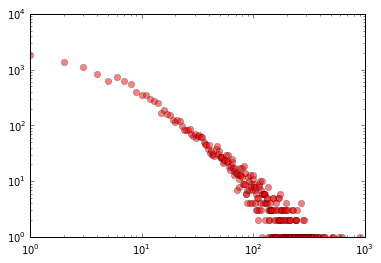

In [95]:
plt.plot(nx.degree_histogram(G),'ro',alpha=0.5)
plt.loglog()

In [96]:
nx.number_connected_components(G)

164

In [24]:
gc_list=list(nx.connected_component_subgraphs(G))

In [25]:
print [H.number_of_nodes() for H in gc_list]

[12946, 2, 2, 2, 2, 27, 5, 2, 3, 2, 2, 2, 2, 2, 3, 3, 2, 3, 2, 6, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 2, 2, 2, 2, 3, 3, 2, 2, 2, 4, 2, 3, 2, 2, 4, 2, 2, 2, 2, 2, 3, 2, 2, 3, 2, 2, 2, 2, 2, 3, 3, 2, 2, 2, 2, 3, 2, 3, 2, 3, 2, 2, 2, 2, 4, 2, 2, 4, 2, 2, 3, 2, 2, 2, 3, 2, 2, 3, 2, 2, 2, 2, 2, 4, 2, 2, 2, 2, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]


[199, 149, 116, 103, 82, 73, 69, 66, 55, 48, 44, 43, 42, 40, 39, 39, 38, 37, 34, 34, 32, 32, 32, 30, 30, 28, 28, 27, 27, 26]


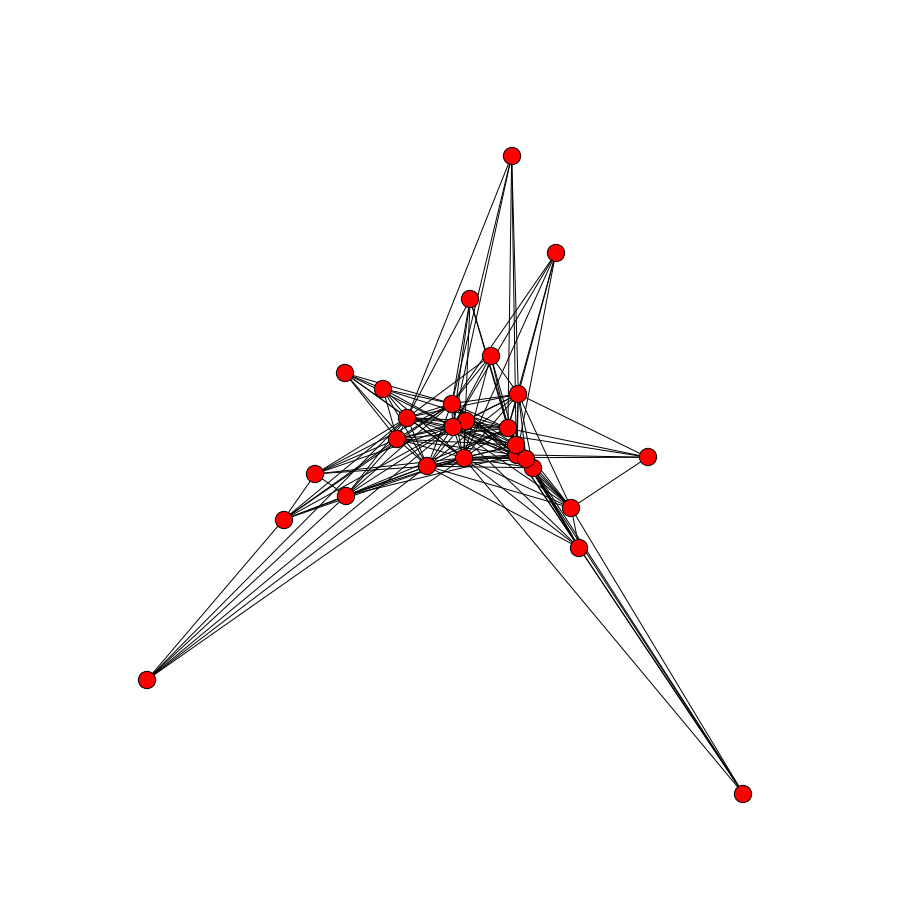

In [114]:
plt.figure(figsize=(12,12))

H=gc_list[5]
L=[ d['w'] for (u,v,d) in H.edges(data=True)]
L.sort(reverse=True)
print L[:30]
#nx.draw(H,width=[ d['w']/10 for (u,v,d) in H.edges(data=True)],node_size=50,alpha=0.5)
nx.draw_spectral(H)


#pos=nx.spectral_layout(gc_list[7])
#print gc_list[7].number_of_nodes()
#nx.draw_networkx_nodes(gc_list[7],pos)
#nx.draw_networkx_edges(gc_list[7],pos,width=[ d['w'] for (u,v,d) in G.edges(data=True)])

In [34]:
import math

331
False
68


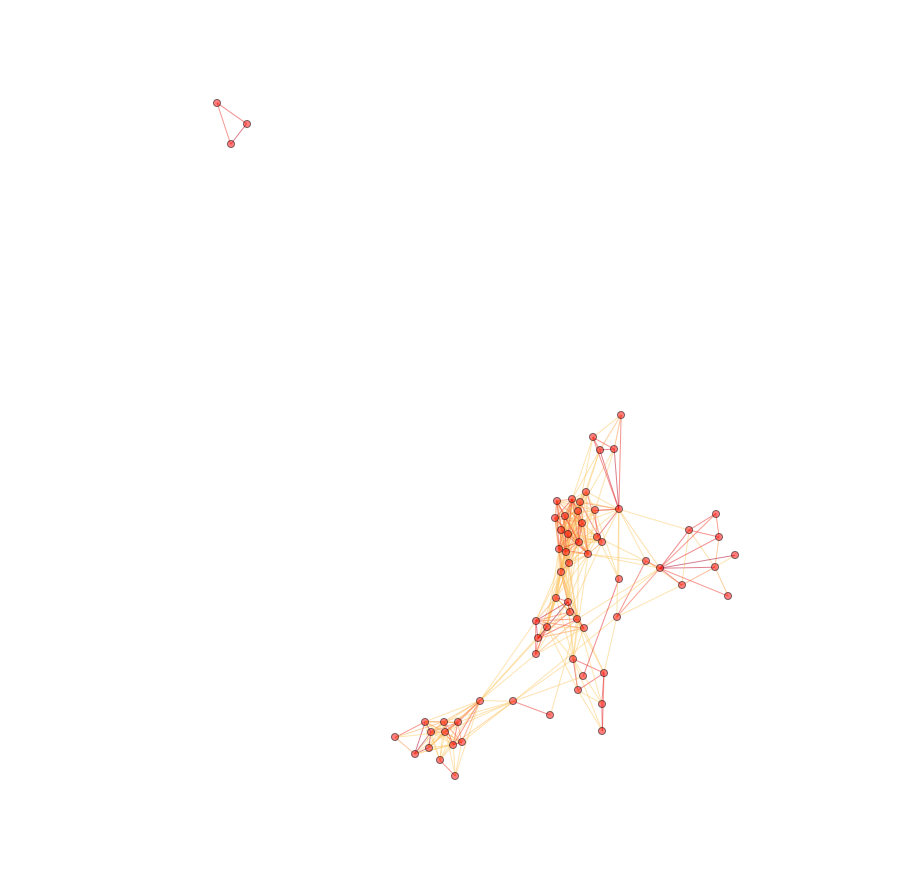

In [35]:
plt.figure(figsize=(12,12))

H=gc_list[0].copy()
t=max([ d['w'] for (u,v,d) in H.edges(data=True)])
print t
l=50
V=[v for v in H.nodes() if any([H[u][v]['w']>=l for u in H.neighbors(v)])]
H=H.subgraph(V)
print nx.is_connected(H)
print H.number_of_nodes()
nx.draw(H,edge_cmap=plt.cm.YlOrRd,edge_vmin=0,edge_vmax=1,edge_color=[ max([float(math.log(d['w']))/math.log(t),0.3]) for (u,v,d) in H.edges(data=True)],node_size=50,alpha=0.5)

[]

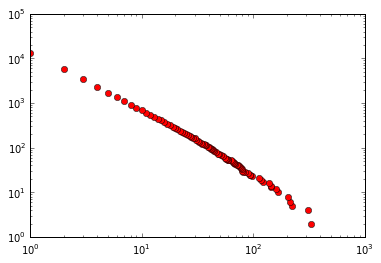

In [110]:
H=gc_list[0].copy()
t=max([ d['w'] for (u,v,d) in H.edges(data=True)])
df_node_level=pd.DataFrame([[v,max([H[u][v]['w'] for u in H.neighbors(v)])] for v in H.nodes()])
df_node_level.columns=['tender_id','max_cobid_neighbor']
number_of_cobidders=df_node_level.groupby('max_cobid_neighbor').size().sort_index(ascending=False).cumsum()

x=number_of_cobidders.index.tolist()
y=number_of_cobidders.tolist()
plt.plot(x,y,'or')
plt.loglog()


Calculate relative gap between cobidders.

In [111]:
tdf=df[df.bidders.apply(lambda x: x!=[])][['tender_registration_number','bidders','bidders_lowest_bids']]
tdf.columns=[0,1,2]

In [112]:
tdf=df[df.bidders.apply(lambda x: x!=[])][['tender_registration_number','bidders','bidders_lowest_bids']]
tdf.columns=[0,1,2]
tdf=pd.DataFrame([\
tdf\
      .apply(lambda row: [row[0]]*len(row[1]),axis=1)\
      .apply(pd.Series).transpose()\
      .unstack()\
      .reset_index(drop=True)\
      .dropna()\
      .tolist(),\
    tdf[1]\
      .apply(pd.Series).transpose()\
      .unstack()\
      .reset_index(drop=True)\
      .dropna()\
      .tolist(),\
    tdf[2]\
      .apply(pd.Series).transpose()\
      .unstack()\
      .reset_index(drop=True)\
      .dropna()\
      .tolist()
 ]).transpose().set_index(1)

In [113]:
tdf.head(10)

,0,2
1,,
204545572,SPA130012785,22110
406030370,SPA130012786,2792
204544635,SPA130012787,4723
204544635,SPA130012788,4844
202886172,SPA130012781,2700
404880483,SPA130012781,2299
404924427,SPA130012781,2300
205043237,SPA130012782,7198
202223147,SPA130012782,7199


How many procurements are there overall?

In [32]:
df.procurring_entity_id.unique().size

2386

[]

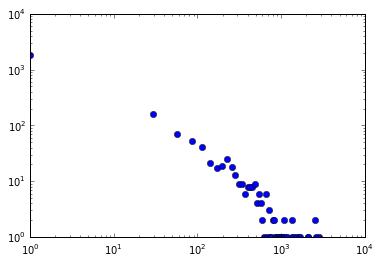

In [38]:
y,x=np.histogram(np.array(df.groupby("procurring_entity_id").size()),bins=100)
plt.plot(x[:-1],y,'o')
plt.loglog()

The procurements with the most tenders.

In [40]:
tender_size_list=df.groupby("procurring_entity_id").size()
tender_size_list.sort(ascending=False)

/home/bencs/.anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: FutureWarning: sort is deprecated, use sort_values(inplace=True) for for INPLACE sorting
  from ipykernel import kernelapp as app


How tenders came in daily for this procurement.

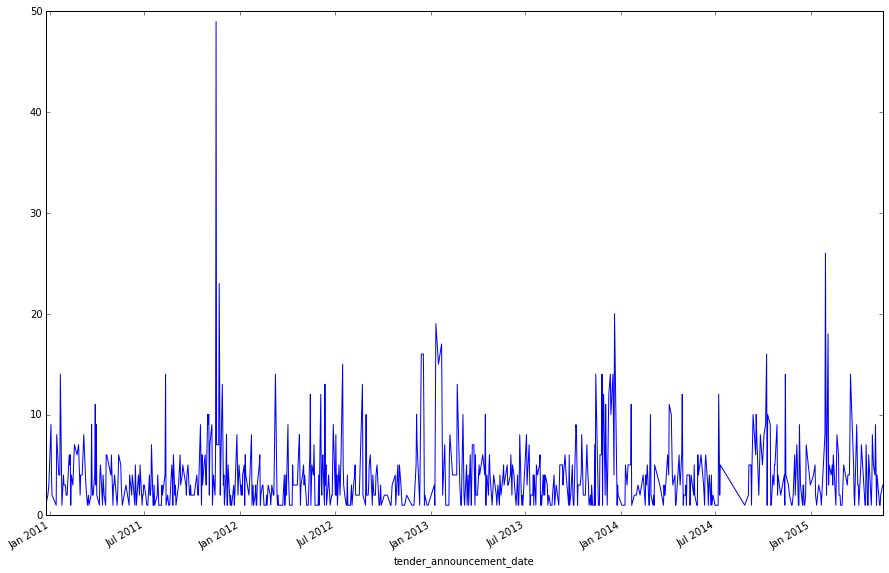

In [41]:
df[df.procurring_entity_id==tender_size_list.index[0]].\
    groupby("tender_announcement_date").\
    size().\
    plot(kind="line",figsize=(15,10))

Same for the second most tenders.

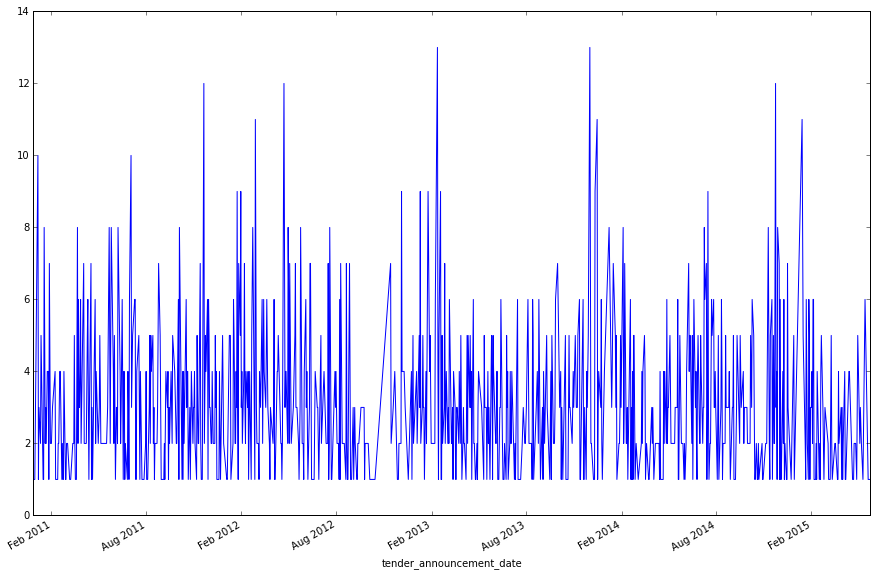

In [42]:
df[df.procurring_entity_id==tender_size_list.index[1]].\
    groupby("tender_announcement_date").\
    size().\
    plot(kind="line",figsize=(15,10))

Possible questions:
- How many days did the biddings last?
- What was the number of bidders?
- How did he price change during the bidding period?
- What was the deadline and when was the winner announced?
- Drawing a co-bidding network.
- Time period between first bid and announcement.

In [44]:
print "\n".join(df.currency[~pd.isnull(df.currency)].unique())

ლარი
აშშ
ევრო


In [45]:
print "\n".join(map(lambda text: trans.translate(text,"en"),df.currency[~pd.isnull(df.currency)].unique()))

NameError: global name 'trans' is not defined